In [22]:
# Reading in the data:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import interp1d
trainData = pd.read_csv('../data/1e7data_train.csv', index_col=0)
testData = pd.read_csv('../data/1e7data_holdout.csv', index_col=0)
df = trainData
dftest = testData
df.tail()

,Stable,Norbits_instability,Norbits,Mplanet,RH/a,a1,P1,e1,pomega1,inc1,...,Omega3,f3,x3,y3,z3,vx3,vy3,vz3,Rel_Eerr,integ_time
Sim_ID,,,,,,,,,,,,,,,,,,,,,
4465,True,1.000000e+07,10000000.0,0.000015,0.021544,0.049234,0.010924,0.011821,2.166832,0.011453,...,2.789696,3.259348,0.030983,-0.059169,0.000167,21.374267,11.236110,-0.066698,2.369995e-09,2116.448846
4231,False,5.556366e+05,10000000.0,0.000015,0.021544,0.043888,0.009194,0.004916,-1.426257,0.007699,...,2.727353,0.045820,-0.053276,-0.020467,0.000202,9.440012,-24.578397,0.093910,1.009360e-06,116.036204
487,False,1.955824e+06,10000000.0,0.000015,0.021544,0.056372,0.013384,0.006294,-0.410190,0.003253,...,0.986391,1.510026,-0.035726,0.068357,0.001008,-20.095628,-10.396225,0.164577,1.375391e-06,415.297114
2210,False,4.607903e+03,10000000.0,0.000015,0.021544,0.054535,0.012735,0.007372,-1.748617,0.015612,...,1.300379,2.400032,-0.059489,-0.037800,0.000467,12.330980,-19.999688,-0.170277,3.707765e-07,1.137060
4390,True,1.000000e+07,10000000.0,0.000015,0.021544,0.042994,0.008915,0.009054,2.988464,0.013263,...,2.602481,-1.222887,-0.025636,0.053283,-0.000530,-23.170345,-11.608123,0.355999,4.047883e-09,2051.816048


In [23]:
# Adding the hill radius to the data:
def HillSep(system):
    return (system['a2']-system['a1'])/(system['a1']*system['RH/a'])
df['HillSep'] = df.apply(HillSep, axis=1)
dftest['HillSep'] = dftest.apply(HillSep, axis=1)
dftest.head()

,Stable,Norbits_instability,Norbits,Mplanet,RH/a,a1,P1,e1,pomega1,inc1,...,f3,x3,y3,z3,vx3,vy3,vz3,Rel_Eerr,integ_time,HillSep
Sim_ID,,,,,,,,,,,,,,,,,,,,,
1648,True,1.000000e+07,10000000.0,0.000015,0.021544,0.040300,0.008090,0.012516,0.738353,0.010083,...,-3.275590,0.005792,-0.053280,-0.000489,26.927592,2.910180,0.267405,1.177787e-09,2025.191727,6.879240
3471,False,8.233677e+05,10000000.0,0.000015,0.021544,0.046764,0.010113,0.015860,1.880579,0.012391,...,-1.810157,-0.026365,0.056034,-0.000466,-22.651159,-11.058909,-0.116447,1.556862e-06,184.336214,8.496936
3849,False,7.204145e+03,10000000.0,0.000015,0.021544,0.042360,0.008718,0.014634,-0.601227,0.009680,...,1.051157,-0.002696,-0.054262,0.000401,26.991435,-1.640005,-0.277935,3.660309e-07,1.671208,6.822671
3537,False,5.851915e+03,10000000.0,0.000015,0.021544,0.053215,0.012276,0.016287,-3.618376,0.012772,...,0.038281,0.011178,0.065261,0.000479,-24.174114,4.147633,0.202255,6.475026e-07,1.748831,5.092680
4214,False,6.435885e+06,10000000.0,0.000015,0.021544,0.054681,0.012787,0.012152,2.292604,0.009484,...,0.768189,0.052411,0.049104,0.000758,-15.953965,17.322053,0.274112,5.588655e-07,970.240703,8.928228


In [24]:
# choosing the appropriate features:
predictors = ['HillSep']
for i in ['1', '2', '3']:
    #columns += ['a'+i, 'P'+i, 'e'+i, 'pomega'+i, 'inc'+i, 'Omega'+i, 'f'+i, 'x'+i, 'y'+i, 'z'+i, 'vx'+i, 'vy'+i, 'vz'+i]
    predictors += ['P'+i, 'e'+i, 'pomega'+i, 'inc'+i, 'Omega'+i, 'f'+i]

y = df['Stable']
X = df[predictors]
X.head()

,HillSep,P1,e1,pomega1,inc1,Omega1,f1,P2,e2,pomega2,inc2,Omega2,f2,P3,e3,pomega3,inc3,Omega3,f3
Sim_ID,,,,,,,,,,,,,,,,,,,
2414,8.989360,0.013449,0.008127,-4.462116,0.003942,-3.134668,1.949717,0.017539,0.016039,-4.172961,0.002068,-1.855286,1.462877,0.021633,0.006592,1.995330,0.010630,2.969187,-1.685085
4056,5.924768,0.011447,0.005201,4.606446,0.009269,2.392131,-3.975319,0.013707,0.015913,1.059685,0.000349,1.279611,1.308241,0.016025,0.007400,-3.935502,0.009493,-1.889784,-0.745085
4855,7.241825,0.012241,0.004883,0.605644,0.000564,0.316897,1.688171,0.015214,0.010873,0.453809,0.016510,-0.394784,-2.362605,0.019525,0.005741,-5.758388,0.005166,-2.642989,0.399412
517,8.840869,0.013338,0.008056,1.245784,0.007544,1.086138,-1.006037,0.017325,0.006096,0.791898,0.002616,-0.707993,-3.734544,0.022566,0.016438,-0.505355,0.015843,1.975103,-0.395186
1520,5.908519,0.010603,0.012062,-0.577740,0.005068,-1.083953,-0.133573,0.012690,0.006588,0.348393,0.012850,-2.202099,-1.864266,0.014832,0.012144,0.102143,0.000987,-2.638114,-3.562545


In [25]:
# Get the training, target and holdout sets for cross validation:
#from sklearn.cross_validation import train_test_split
#X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=42)

#X_train=X
#y_train=y


In [26]:
#Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

In [27]:
def modelfit(alg, dtrain,predictors, dtest, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    target = 'Stable'
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    dtest_predprob = alg.predict_proba(dtest[predictors])[:,1]
        
    #Print model report:
    print "\nModel Report"
  #  print "Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob)
    print "AUC Score (Test): %f" % metrics.roc_auc_score(dtest[target], dtest_predprob)
    
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')


Model Report
AUC Score (Train): 0.989404
AUC Score (Test): 0.881759


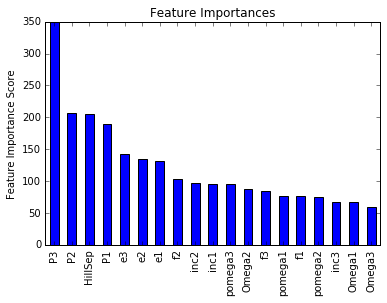

In [28]:
#Choose all predictors except target & IDcols

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=6,
 min_child_weight=10,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, df, predictors, dftest)


Model Report
AUC Score (Train): 0.989404
AUC Score (Test): 0.881759


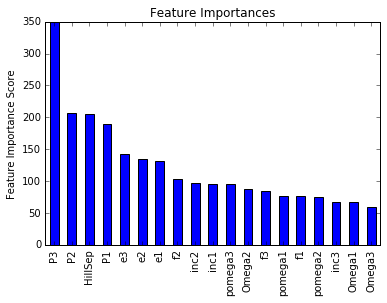

In [29]:
modelfit(xgb1,df,predictors,dftest)

In [30]:
#model=CV_rfc.best_estimator_
model=xgb1

In [31]:
y_pred=model.predict_proba(df[predictors])

In [32]:
print y_pred

[[ 0.32794523  0.67205477]
 [ 0.98418236  0.01581763]
 [ 0.21885312  0.78114688]
 ..., 
 [ 0.70133972  0.29866025]
 [ 0.98880738  0.01119263]
 [ 0.27266574  0.72733426]]


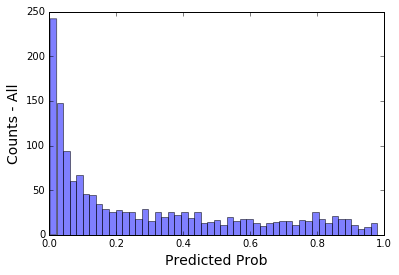

In [47]:
fig, ax= plt.subplots()
ax.hist(y_pred[:,1], bins=50, alpha=0.5)
ax.set_xlabel('Predicted Prob', fontsize=14)
ax.set_ylabel('Counts - All', fontsize=14)
plt.show()

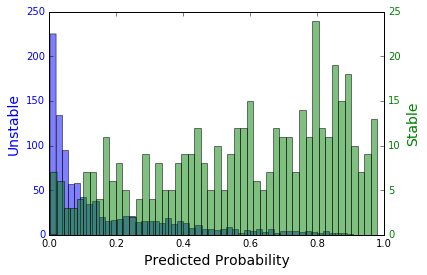

In [40]:
# Histogram:

bins = 50
y_pred=model.predict_proba(dftest[predictors])
Stable=y_pred[dftest['Stable'].values][:,1]
Unstable=y_pred[~dftest['Stable'].values][:,1]


#df['Predict'].loc[df['Truth']==1]

fig, ax1 = plt.subplots()
ax1.hist(Unstable, bins, alpha=0.5, label='No', color='blue')
ax1.set_xlabel('Predicted Probability', fontsize=14)
ax1.set_ylabel('Unstable',  fontsize=14, color='blue')
for tl in ax1.get_yticklabels():
    tl.set_color('blue')
    


ax2 = ax1.twinx()
ax2.hist(Stable, bins, alpha=0.5, label='Yes',color='green')
ax2.set_ylabel('Stable', fontsize=14, color='green')
for tl in ax2.get_yticklabels():
    tl.set_color('green')
 
#ax1.set_ylim(ax2.get_ylim())


In [35]:
np.percentile?

In [36]:
quant = np.arange(0.01, 1.0, 0.01)*100
prob_Stable = np.percentile(Stable,quant)

quant_f = interp1d(prob_Stable, quant)
prob_f=interp1d(quant, prob_Stable)

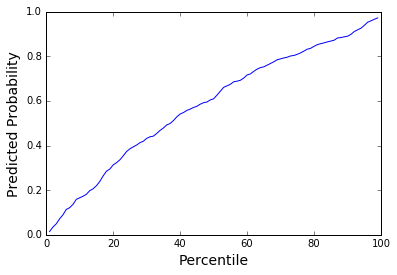

In [44]:
fig, ax = plt.subplots()
plt.plot(quant, prob_Stable)
ax.set_xlabel('Percentile', fontsize=14)
ax.set_ylabel('Predicted Probability', fontsize=14)
plt.show()

In [38]:
_tv = []
_accv = []
_accnormv = []
for i, thresh in enumerate(prob_Stable):
    _loc_yes = Stable >= thresh
    _loc_no = Unstable >= thresh
    _yes = Stable[_loc_yes].shape[0]
    _no = Unstable[_loc_no].shape[0]
    _total = _yes + _no
    if i % 5 == 0:
        print(thresh, _yes*100 / _total)
    _tv.append(thresh)
    _accv.append(_yes*100/_total)
#    _accnormv.append(_yes / Stable.shape[0] / (_yes / Stable.shape[0] + _no / Unstable.shape[0]))
_tv = np.asarray(_tv)
_accv = np.asarray(_accv)
#_accnormv = np.asarray(_accnormv)

(0.014528881078585982, 32)
(0.11364103496074676, 48)
(0.1727497026324272, 53)
(0.23875969767570493, 57)
(0.32312308400869366, 63)
(0.39405088126659399, 69)
(0.43903102755546575, 73)
(0.49205263733863835, 75)
(0.54772705078124995, 78)
(0.58512099981307986, 79)
(0.62578934133052833, 81)
(0.68557523488998406, 84)
(0.72089462578296659, 85)
(0.76017363190650933, 87)
(0.79232207179069536, 90)
(0.81517665624618529, 90)
(0.85203489422798162, 94)
(0.87184728622436525, 96)
(0.89786956250667571, 97)
(0.95229665279388453, 100)


Pred prob for 90 percent accuracy: 0.795674
Pred prob for 80 percent accuracy: 0.594444


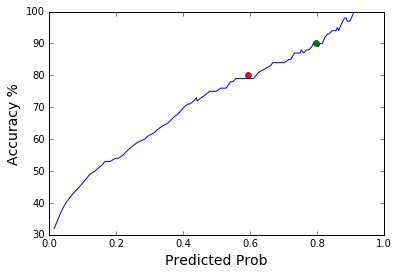

To obtain 90 percent accuracy need to go to 72 quantile
To obtain 80 percent accuracy need to go to 48 quantile


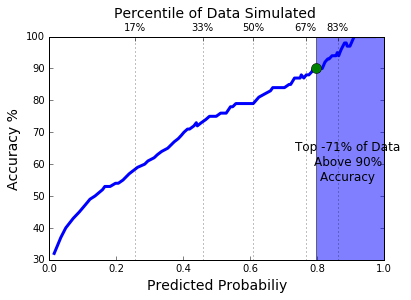

In [49]:
# Find 90% accuracy:
# calculate fit
thr_f = interp1d(_accv, _tv)

# calculate new x's and y's
thresh_fit = thr_f(_accv)
thresh_90=thr_f(90)
thresh_80=thr_f(80)

print('Pred prob for 90 percent accuracy: %f' % thresh_90)
print('Pred prob for 80 percent accuracy: %f' % thresh_80)

fig, ax1 = plt.subplots()
plt.plot(_tv, _accv , thresh_90, 90, 'o', thresh_80, 80, 'o')

ax1.set_xlabel('Predicted Prob', fontsize=14)
ax1.set_ylabel('Accuracy %', fontsize=14)
plt.show()

# calculate new x's and y's
quant_fit = quant_f(prob_Stable)
quant_acc90=quant_f(thresh_90)
quant_acc80=quant_f(thresh_80)
print('To obtain 90 percent accuracy need to go to %1.f quantile' % quant_acc90)
print('To obtain 80 percent accuracy need to go to %1.f quantile' % quant_acc80)


fig, ax1 = plt.subplots()
#plt.plot(f(_tv),_accv *100., f(thresh_90),0.9*100., 'o', markersize=10, color=orangeWCN, LineWidth=3)
ax1.plot(_tv,_accv, thresh_90, 90, 'o', markersize=10,  lw=3, zorder=60)
ax1.set_xlabel('Predicted Probabiliy', fontsize=14)

ax1.set_ylabel('Accuracy %', fontsize=14)
ay2 = ax1.twiny()

# setting grid:
#plt.grid()
xticks=prob_f(np.array([0.167, 0.333, 0.5, 0.667, 0.833])*100)
xlabels=['17%', '33%', '50%', '67%','83%']


ay2.xaxis.grid(True, which='major', zorder=50)

ay2.set_xlabel('Percentile of Data Simulated ' , fontsize=14)
ay2.set_xlim(ax1.get_xlim())
ay2.set_xticks(xticks, minor=False)
ay2.set_xticklabels(xlabels)



ax1.axvspan(thresh_90, 1, alpha=0.5, zorder=20)
legend = ax1.text((1-thresh_90)/2+thresh_90, 55, 'Top %.0f%% of Data \nAbove 90%% \nAccuracy ' %((1-quant_f(thresh_90))),
                  fontsize=12, ha='center', zorder=40)

